PHÂN TÍCH MÔ TẢ

In [1]:
#Khởi tạo SparkSession
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("Diabetes").getOrCreate()

df = spark.read.csv(
    "output/cleaned_data.csv",
    header=True,
    inferSchema=True
)

In [2]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- gender: integer (nullable = true)
 |-- physical_activity_minutes_per_week: integer (nullable = true)
 |-- diet_score: double (nullable = true)
 |-- family_history_diabetes: integer (nullable = true)
 |-- bmi: double (nullable = true)
 |-- systolic_bp: integer (nullable = true)
 |-- hdl_cholesterol: integer (nullable = true)
 |-- triglycerides: integer (nullable = true)
 |-- glucose_fasting: integer (nullable = true)
 |-- hba1c: double (nullable = true)
 |-- diabetes_risk_score: double (nullable = true)



In [3]:
df.count()


100000

In [4]:
df.describe().show()


+-------+------------------+-------------------+----------------------------------+------------------+-----------------------+------------------+------------------+------------------+------------------+-----------------+------------------+-------------------+
|summary|               age|             gender|physical_activity_minutes_per_week|        diet_score|family_history_diabetes|               bmi|       systolic_bp|   hdl_cholesterol|     triglycerides|  glucose_fasting|             hba1c|diabetes_risk_score|
+-------+------------------+-------------------+----------------------------------+------------------+-----------------------+------------------+------------------+------------------+------------------+-----------------+------------------+-------------------+
|  count|            100000|              97987|                            100000|            100000|                 100000|            100000|            100000|            100000|            100000|           100000|

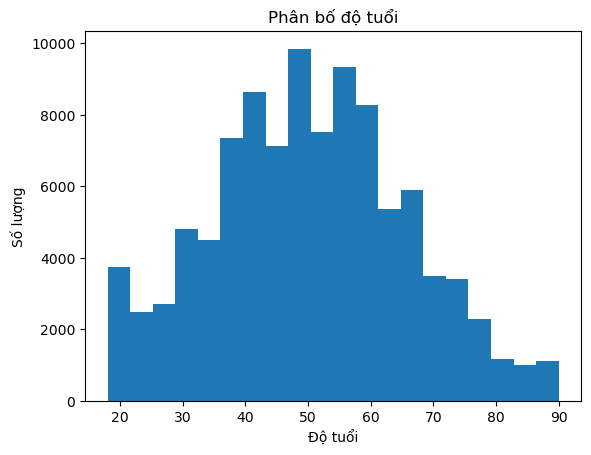

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

pdf = df.toPandas()

plt.figure()
plt.hist(pdf["age"], bins=20)
plt.xlabel("Độ tuổi")
plt.ylabel("Số lượng")
plt.title("Phân bố độ tuổi")
plt.show()

Biểu đồ histogram cho thấy độ tuổi phân bố trên nhiều nhóm khác nhau, tập trung chủ yếu ở nhóm tuổi trưởng thành. Điều này phù hợp với mục tiêu nghiên cứu nguy cơ mắc bệnh tiểu đường.

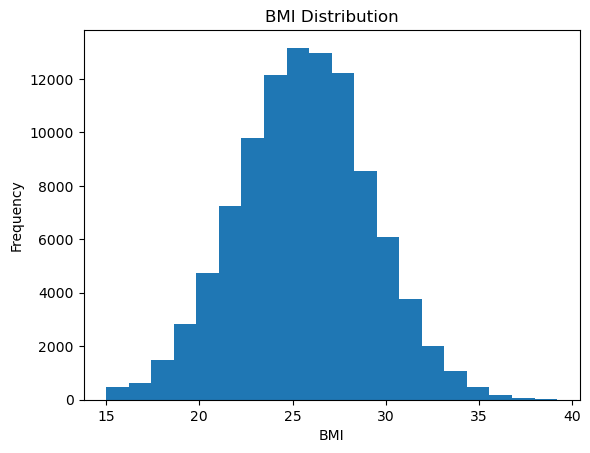

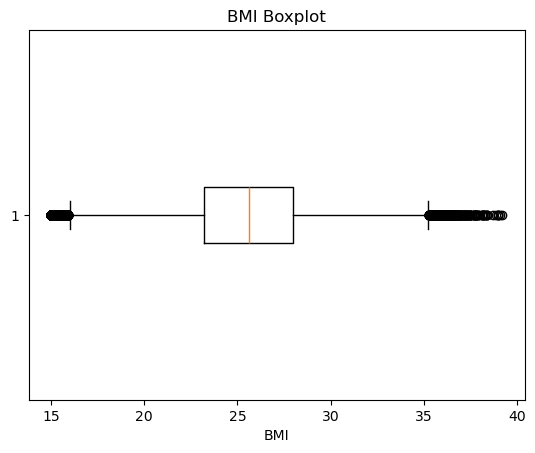

In [9]:
plt.figure()
plt.hist(pdf["bmi"], bins=20)
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.title("BMI Distribution")
plt.show()

plt.figure()
plt.boxplot(pdf["bmi"], vert=False)
plt.xlabel("BMI")
plt.title("BMI Boxplot")
plt.show()


Chỉ số BMI có sự phân bố rộng và xuất hiện một số giá trị ngoại lai. Điều này cho thấy sự khác biệt rõ rệt về thể trạng giữa các cá nhân, yếu tố quan trọng ảnh hưởng đến nguy cơ tiểu đường.